In [1]:
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.optimizers import SGD
from keras_tuner import RandomSearch

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

import keras_tuner as kt

### For multiclass classification we labeled the datasets A, B, C, D and E as '0', '1','2', '3',and '4', resepctively. We used SVM model and LSTM model to classify the dataset

In [2]:
# We Labeled the datasets A, B, C, D and E as '0', '1','2', '3',and '4', resepctively
# DataA
pathA = r'D:/Final_project/Data/merged/A' 
all_filesA = glob.glob(pathA + "/*.csv")

tempA = []

for filename in all_filesA:
    df1 = pd.read_csv(filename, index_col=None, header=0)
    tempA.append(df1)

dfA = pd.concat(tempA, axis=0, ignore_index=True)
dfA.insert(loc=len(dfA.columns), column='Y', value='0', allow_duplicates=True)


# DataB
pathB = r'D:/Final_project/Data/merged/B' 
all_filesB = glob.glob(pathB + "/*.csv")

tempB = []

for filename in all_filesB:
    df2 = pd.read_csv(filename, index_col=None, header=0)
    tempB.append(df2)

dfB = pd.concat(tempB, axis=0, ignore_index=True)
dfB.insert(loc=len(dfB.columns), column='Y', value='1', allow_duplicates=True)

# DataC
pathC = r'D:/Final_project/Data/merged/C'
all_filesC = glob.glob(pathC + "/*.csv")

tempC = []

for filename in all_filesC:
    df3 = pd.read_csv(filename, index_col=None, header=0)
    tempC.append(df3)

dfC = pd.concat(tempC, axis=0, ignore_index=True)
dfC.insert(loc=len(dfC.columns), column='Y', value='2', allow_duplicates=True)


## Data D
pathD = r'D:/Final_project/Data/merged/D' 
all_filesD = glob.glob(pathD + "/*.csv")

tempD = []

for filename in all_filesD:
    df4 = pd.read_csv(filename, index_col=None, header=0)
    tempD.append(df4)

dfD = pd.concat(tempD, axis=0, ignore_index=True)
dfD.insert(loc=len(dfD.columns), column='Y', value='3', allow_duplicates=True)


## Data E
pathE = r'D:/Final_project/Data/merged/E' 
all_filesE = glob.glob(pathE + "/*.csv")

tempE = []

for filename in all_filesE:
    df5 = pd.read_csv(filename, index_col=None, header=0)
    tempE.append(df5)

dfE = pd.concat(tempE, axis=0, ignore_index=True)
dfE.insert(loc=len(dfE.columns), column='Y', value='4', allow_duplicates=True)

In [3]:
df = pd.concat([dfA, dfB,dfC,dfD,dfE], ignore_index=True)

C:\Users\kau19001\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The number of samples for the class 0 is: 2300
The number of samples for the class 1 is: 2300
The number of samples for the class 2 is: 2300
The number of samples for the class 3 is: 2300
The number of samples for the class 4 is: 2300


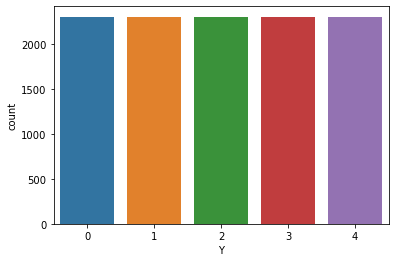

In [4]:
import seaborn as sn
tgt=df["Y"]
tgt= tgt.astype('int')
ax = sn.countplot(tgt, label="Count")
class0 = np.count_nonzero(tgt == 0)
class1 = np.count_nonzero(tgt == 1) 
class2 = np.count_nonzero(tgt == 2) 
class3 = np.count_nonzero(tgt == 3) 
class4 = np.count_nonzero(tgt == 4) 

print('The number of samples for the class 0 is:', class0)
print('The number of samples for the class 1 is:', class1)
print('The number of samples for the class 2 is:', class2)
print('The number of samples for the class 3 is:', class3)
print('The number of samples for the class 4 is:', class4)

In [5]:
target=df["Y"]
target = target.astype('int')
df2=df.drop(["Y"],axis=1)

In [6]:
# feature extraction using wavelet transform
import pywt
def getWaveletFeatures(data,target):
    list_features = []
    for signal in range(len(data)):
        list_coeff = pywt.wavedec(data.iloc[signal], "db4")
        features = []
        for coeff in list_coeff:
            features += statisticsForWavelet(coeff)
        list_features.append(features)
    return createDfWavelet(list_features,target)

def statisticsForWavelet(coefs):
    median = np.nanpercentile(coefs, 50)
    mean = np.nanmean(coefs)
    std = np.nanstd(coefs)
    var = np.nanvar(coefs)
    rms = np.nanmean(np.sqrt(coefs**2))
    return [median, mean, std, var, rms]

def createDfWavelet(data,target):
    for i in range(len(data)):
        data[i].append(target[i])
    return pd.DataFrame(data) 

In [7]:
df2_fea=getWaveletFeatures(df2,target)
df2_fea = shuffle(df2_fea)
df2_fea.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
2848,-31.343243,-34.012856,207.759962,43164.201738,183.995829,16.560648,36.190475,164.117458,26934.539996,108.647743,...,0.466607,25.388654,644.583761,20.806181,-0.148919,-0.002840,3.789869,14.363104,3.116586,1
10411,76.579972,307.045028,665.490042,442876.995724,600.148705,-17.179161,-43.312953,376.312192,141610.866125,261.947111,...,-2.021693,51.467090,2648.861358,26.885099,-0.382091,-0.577731,14.057109,197.602319,6.631392,4
8746,96.867484,101.650572,46.756080,2186.131055,101.650572,-0.963472,-0.196251,50.610179,2561.390191,40.893210,...,0.217687,6.780086,45.969570,5.638942,-0.129436,-0.248087,2.280450,5.200450,1.828311,3
11109,20.681460,50.485645,379.282821,143855.457962,256.595483,-0.181144,5.362348,167.161088,27942.829356,81.122005,...,0.409616,27.114191,735.179333,15.250008,0.158586,0.102648,7.689009,59.120853,3.594959,4
9091,-14.888638,2.367473,192.504660,37058.044149,138.663634,20.565568,5.877719,73.964270,5470.713256,56.060944,...,-0.367670,13.938584,194.284136,11.060586,-0.751696,-0.334704,4.221388,17.820116,3.364999,3


In [8]:
X = df2_fea.iloc[:,0:24].values
Y = df2_fea.iloc[:,25].values
Y

array([1, 4, 3, ..., 3, 2, 4])

In [9]:
# normalize the dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# split the dataset into training (80%) and testing (20%) set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.13, random_state=1) 

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

svmclf = SVC(kernel='rbf', probability=True)


## define the hyperparameters of SVM model
param_grid = {
    'C':   [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly','rbf'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'degree': [1, 2, 3, 4, 5]}

searchSVM = RandomizedSearchCV(svmclf, param_grid, cv = 5, 
                              n_iter=5, scoring ='accuracy',
                              refit='precision',
                              return_train_score=False,
                              n_jobs=-1,
                              verbose=1)
searchSVM.fit(X_train,Y_train)

SVM = searchSVM.best_params_

clf_svm = SVC(
    C = SVM['C'], 
    kernel = SVM['kernel'], 
    gamma = SVM['gamma'],
    degree = SVM['degree'],probability=True)
clf_svm.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


SVC(C=10, degree=1, gamma=0.1, kernel='linear', probability=True)

In [11]:
y_predtrain = cross_val_predict(clf_svm, X_val, Y_val, cv=5)

#print the performance metrics (precison, recall and f1 score) on training dataset for all class
print("Training metrics\n",classification_report(Y_val, y_predtrain,target_names=['Eyes opened','Eyes closed','Healthy Area','Tumor Area','Seizure']))

Training metrics
               precision    recall  f1-score   support

 Eyes opened       0.65      0.74      0.69       235
 Eyes closed       0.76      0.68      0.71       240
Healthy Area       0.53      0.58      0.55       234
  Tumor Area       0.51      0.47      0.49       233
     Seizure       0.96      0.92      0.94       254

    accuracy                           0.68      1196
   macro avg       0.68      0.68      0.68      1196
weighted avg       0.69      0.68      0.68      1196



Testing metrics
               precision    recall  f1-score   support

 Eyes opened       0.69      0.74      0.71       443
 Eyes closed       0.76      0.73      0.75       472
Healthy Area       0.54      0.71      0.62       473
  Tumor Area       0.56      0.38      0.45       456
     Seizure       0.96      0.93      0.94       456

    accuracy                           0.70      2300
   macro avg       0.70      0.70      0.69      2300
weighted avg       0.70      0.70      0.69      2300



<AxesSubplot:>

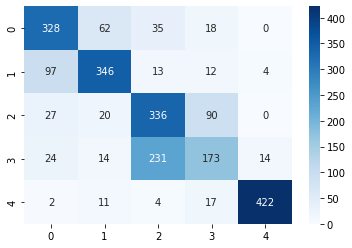

In [12]:
y_pred = cross_val_predict(clf_svm,X_test,Y_test,cv=5)

#print the performance metrics (precison, recall and f1 score) on testing dataset for all class
print("Testing metrics\n",classification_report(Y_test, y_pred,target_names=['Eyes opened','Eyes closed','Healthy Area','Tumor Area','Seizure']))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(cm, range(5), range(5))
sn.heatmap(df_cm, annot=True,fmt='g',cmap ='Blues')

## LSTM model for multi class classification

In [13]:
## Now let us try recurrent neural network (LSTM) for seizure detection and classification

In [14]:
df = shuffle(df)
X1 = df.iloc[:,1:177].values
Y1 = df.iloc[:,178].values

# normalize the dataset
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)
from keras.utils import to_categorical
Y1 = to_categorical(Y1)

# split the training (60%) validation (20%) and testing (20%) dataset
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2)
X1_train, X1_val, Y1_train, Y1_val = train_test_split(X1_train, Y1_train, test_size=0.13, random_state=1)

X1_train = np.reshape(X1_train, (X1_train.shape[0],1,X1.shape[1]))
X1_test = np.reshape(X1_test, (X1_test.shape[0],1,X1.shape[1]))
X1_val = np.reshape(X1_val, (X1_val.shape[0],1,X1.shape[1]))

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.optimizers import SGD
from keras_tuner import RandomSearch

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

In [16]:
#  to find the the optimal number of LSTM layers we used hp.int() in a for loop, which could take value 1 to 4.
# To avoid overfitting the neural network, we add a dropout layer and to find the right drop out we used hp.Float().
# and defined the the final layer as dense layer
#After defining the hyper-parameters we compiled the model with RMSprop optimizer,
# binary cross-Entropy loss function, and metric and return that model

# we used early stopping to Stop the training when a monitored metric has stopped improving.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=16,max_value=512,step=16),return_sequences=True, input_shape=(X1_train.shape[1],X1_train.shape[2])))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=16,max_value=512,step=16),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=16,max_value=512,step=16)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.9,step=0.1)))
    model.add(Dense(Y1_train.shape[1], activation=hp.Choice('dense_activation',values=['relu', 'sigmoid','softmax'])))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [17]:
import keras_tuner as kt
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='D:\Final_project\Save_model\Muticlass',
                     project_name='Best_model2')

INFO:tensorflow:Reloading Oracle from existing project D:\Final_project\Save_model\Muticlass\Best_model2\oracle.json
INFO:tensorflow:Reloading Tuner from D:\Final_project\Save_model\Muticlass\Best_model2\tuner0.json


In [18]:
tuner.search(
        x=X1_train,
        y=Y1_train,
        epochs=50,
        validation_data=(X1_val,Y1_val),
         callbacks=[stop_early]
        )

INFO:tensorflow:Oracle triggered exit


In [19]:
tuner.results_summary()

Results summary
Results in D:\Final_project\Save_model\Muticlass\Best_model2
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 512
n_layers: 1
lstm_0_units: 480
layer_2_neurons: 288
Dropout_rate: 0.2
dense_activation: softmax
learning_rate: 0.001
lstm_1_units: 224
lstm_2_units: 144
lstm_3_units: 512
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0047
Score: 0.7274247407913208
Trial summary
Hyperparameters:
input_unit: 176
n_layers: 2
lstm_0_units: 64
layer_2_neurons: 16
Dropout_rate: 0.5
dense_activation: softmax
learning_rate: 0.001
lstm_1_units: 464
lstm_2_units: 176
lstm_3_units: 288
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.6881271004676819
Trial summary
Hyperparameters:
input_unit: 512
n_layers: 1
lstm_0_units: 480
layer_2_neurons: 288
Dropout_rate: 0.2
dense_activation: softmax
learning_rate: 0.001
lstm_1_units: 224
lstm_2_units: 144
lstm_3_units: 512
tuner/epochs: 17
tuner/initial_ep

In [20]:
best_model = tuner.get_best_models()[0]
best_model.build(X1_train.shape)
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 512)            1411072   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 480)            1906560   
_________________________________________________________________
lstm_2 (LSTM)                (None, 288)               885888    
_________________________________________________________________
dropout (Dropout)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 1445      
Total params: 4,204,965
Trainable params: 4,204,965
Non-trainable params: 0
_________________________________________________________________


In [21]:
best_model.fit(X1_train,Y1_train,epochs=50,
        validation_data=(X1_val,Y1_val),
        batch_size = 16,
        callbacks=[stop_early])

Epoch 1/50
501/501 [==============================] - 18s 37ms/step - loss: 0.5233 - accuracy: 0.7880 - val_loss: 0.5416 - val_accuracy: 0.7818
Epoch 2/50
501/501 [==============================] - 15s 30ms/step - loss: 0.3992 - accuracy: 0.8342 - val_loss: 0.5277 - val_accuracy: 0.7818
Epoch 3/50
501/501 [==============================] - 15s 29ms/step - loss: 0.3423 - accuracy: 0.8608 - val_loss: 0.5796 - val_accuracy: 0.7768
Epoch 4/50
501/501 [==============================] - 15s 29ms/step - loss: 0.2886 - accuracy: 0.8812 - val_loss: 0.5988 - val_accuracy: 0.7926
Epoch 5/50
501/501 [==============================] - 14s 29ms/step - loss: 0.2485 - accuracy: 0.8977 - val_loss: 0.6653 - val_accuracy: 0.7634
Epoch 6/50
501/501 [==============================] - 14s 29ms/step - loss: 0.2212 - accuracy: 0.9108 - val_loss: 0.7195 - val_accuracy: 0.7751
Epoch 7/50
501/501 [==============================] - 15s 29ms/step - loss: 0.1901 - accuracy: 0.9228 - val_loss: 0.7839 - val_accuracy:

              precision    recall  f1-score   support

 Eyes opened       0.77      0.74      0.75       484
 Eyes closed       0.79      0.86      0.83       433
Healthy Area       0.70      0.63      0.66       471
  Tumor Area       0.69      0.74      0.71       474
     Seizure       0.98      0.97      0.97       438

    accuracy                           0.78      2300
   macro avg       0.79      0.79      0.78      2300
weighted avg       0.78      0.78      0.78      2300



<AxesSubplot:>

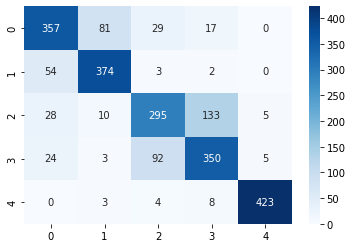

In [22]:
Y_pred = best_model.predict(X1_test)

# calculate the performance metrics (precision, recall and f1 score)
print(classification_report(Y1_test.argmax(axis=1), Y_pred.argmax(axis=1), target_names=['Eyes opened','Eyes closed','Healthy Area','Tumor Area','Seizure']))
cm2 = confusion_matrix(Y1_test.argmax(axis=1), Y_pred.argmax(axis=1))
df_cm2 = pd.DataFrame(cm2, range(5), range(5))
sn.heatmap(df_cm2, annot=True,fmt='g',cmap ='Blues')

In [23]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='constant', constant=1)
dummy_clf.fit(X_train, Y_train)
Yd_pred = dummy_clf.predict(X_test)

Testing metrics
               precision    recall  f1-score   support

 Eyes opened       0.00      0.00      0.00       443
 Eyes closed       0.21      1.00      0.34       472
Healthy Area       0.00      0.00      0.00       473
  Tumor Area       0.00      0.00      0.00       456
     Seizure       0.00      0.00      0.00       456

    accuracy                           0.21      2300
   macro avg       0.04      0.20      0.07      2300
weighted avg       0.04      0.21      0.07      2300



C:\Users\kau19001\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kau19001\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kau19001\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

<AxesSubplot:>

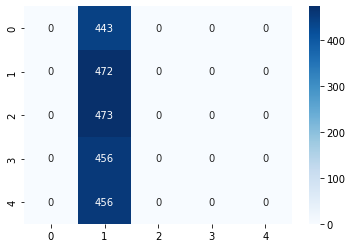

In [24]:
print("Testing metrics\n",classification_report(Y_test, Yd_pred,target_names=['Eyes opened','Eyes closed','Healthy Area','Tumor Area','Seizure']))

# confusion matrix
cmd = confusion_matrix(Y_test, Yd_pred)
df_cmd = pd.DataFrame(cmd, range(5), range(5))
sn.heatmap(df_cmd, annot=True,fmt='g',cmap ='Blues')

## ROC curves of all models

Instructions for updating:
Please use `model.predict()` instead.


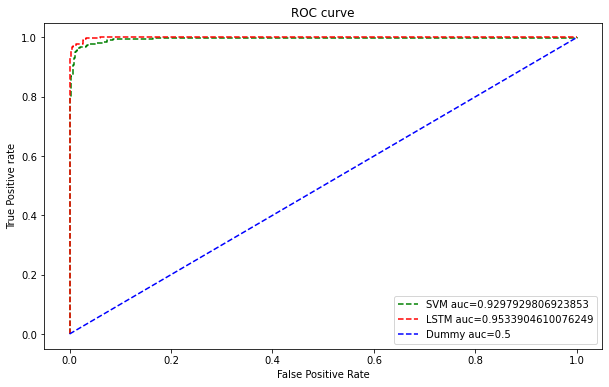

In [25]:
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

pred_prob1 = clf_svm.predict_proba(X_test)
pred_prob2 = best_model.predict_proba(X1_test)
pred_prob3 = dummy_clf.predict_proba(X_test)

Y_bin1 = label_binarize(Y_test, classes=[0,1, 2,3,4])
Y_bin2 = label_binarize(Y1_test, classes=[0,1, 2,3,4])


auc1 = metrics.roc_auc_score(Y_test, pred_prob1, multi_class='ovr')
auc2 = metrics.roc_auc_score(Y1_test, pred_prob2,multi_class='ovr' )
auc3 = metrics.roc_auc_score(Y_test, pred_prob3, multi_class='ovr')


plt.figure(1, figsize=(10, 6))
plt.clf()




for j in range(0,np.size(Y_bin1,1)):
    fpr1, tpr1, T1 = roc_curve(Y_bin1[:,j], pred_prob1[:,j])
    fpr2, tpr2, T2 = roc_curve(Y_bin2[:,j], pred_prob2[:,j])
    fpr3, tpr3, T3 = roc_curve(Y_bin1[:,j], pred_prob3[:,j])
#random_probs = [0 for i in range(len(Y_test))]
#p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label="SVM auc="+str(auc1))
plt.plot(fpr2, tpr2, linestyle='--',color='red', label="LSTM auc="+str(auc2))
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label="Dummy auc="+str(auc3))
#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
